In [1]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

**Question 5:**

In [2]:
# Data points
x1 = np.array([0, 0])
x2 = np.array([0, 1])
x3 = np.array([1, 1])
x4 = np.array([1, 0])
x5 = np.array([3, 0])
x6 = np.array([3, 1])
x7 = np.array([4, 0])
x8 = np.array([4, 1])
data_points = np.array([x1, x2, x3, x4, x5, x6, x7, x8])

In [3]:
# Initial centers
c1_init = np.array([0, 0])
c2_init = np.array([3, 0])
centers = np.array([c1_init, c2_init])

In [7]:
def k_means(data_points, centers, n_clusters, max_iterations=100, tol=1e-4):
  for _ in range(max_iterations):
    # Assign each data point to the closest centroid
    labels = np.argmin(np.linalg.norm(data_points[:, np.newaxis] - centers , axis =2) , axis =1)
    # print(np.linalg.norm(data_points[:, np.newaxis] - centers , axis =2))
    # print(labels)
    # Update centroids to be the mean of the data points assigned to them
    new_centers = np.zeros((n_clusters , data_points.shape[1]))
    # End if centroids no longer change
    for i in range(n_clusters):
      new_centers[i] = data_points[labels == i].mean(axis=0)
    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers , labels

In [8]:
centers, labels = k_means(data_points, centers, n_clusters=2)
print("Converged centers:", centers)

[0 0 0 0 1 1 1 1]
Converged centers: [[0.5 0.5]
 [3.5 0.5]]


**Question 6:**

In [9]:
# Generate data
# Set three centers, the model should predict similar results
center_1 = np.array([2,2])
center_2 = np.array([4,4])
center_3 = np.array([6,1])
# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data = np.concatenate((data_1, data_2, data_3), axis = 0)

In [14]:
# initialize cluster centers
k=5
centers = data[np.random.choice(len(data), k, replace=False)]

In [11]:
def k_means(data_points, centers, n_clusters, max_iterations=100, tol=1e-4):
  for _ in range(max_iterations):
    # Assign each data point to the closest centroid
    labels = np.argmin(np.linalg.norm(data_points[:, np.newaxis] - centers , axis =2) , axis =1)
    # Update centroids to be the mean of the data points assigned to them
    new_centers = np.zeros((n_clusters , data_points.shape[1]))
    # End if centroids no longer change
    for i in range(n_clusters):
      new_centers[i] = data_points[labels == i].mean(axis=0)
    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, labels

In [15]:
centers, labels = k_means(data, centers, n_clusters=k)
print("Converged centers:", centers)
print("Converged labels:", labels)

Converged centers: [[2.77771298 3.12087071]
 [1.52779927 1.40205025]
 [4.34908799 4.34873315]
 [6.54939038 1.31188292]
 [4.99765764 0.30916068]]
Converged labels: [0 1 1 1 1 4 1 1 1 1 1 1 0 0 0 1 4 1 1 0 1 0 0 1 1 0 0 0 1 0 4 1 0 0 4 0 0
 1 0 1 4 1 0 0 4 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1
 0 0 0 4 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 2 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 4 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
 1 1 1 0 0 0 1 1 0 1 1 1 4 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 1
 0 2 0 2 0 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 3 0 2 0 0 2 2 2
 2 2 2 0 2 2 0 2 2 0 2 0 2 2 2 2 0 2 2 2 0 2 2 0 0 0 2 2 2 2 2 2 2 0 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 2 2 3 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 0 4 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0
 2 2 2 0 0 2 2 0 2 1 0 2 2 0 0 0 2 0 2 2 2 2 2 2 1 2 2 2 2 2 3 3 3 4 3 3 3
 3 4 3 4 4 3

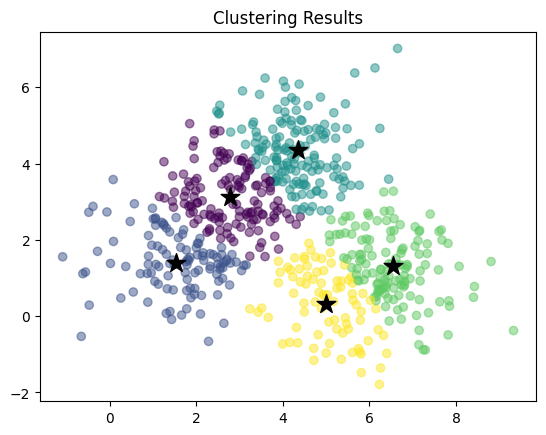

In [16]:
plt.title("Clustering Results")
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker="*", s=200, c="k")
plt.show()

**Question 7:**

In [18]:
# load the iris dataset
iris = load_iris ()
# get the data and the true labels
data = iris.data
y_true = iris.target
# initialize the KMeans centers with K=3
k=3
centers = data[np.random.choice(len(data), k, replace=False)]

In [19]:
def k_means(data_points, centers, n_clusters, max_iterations=1000, tol=1e-6):
  for _ in range(max_iterations):
    # Assign each data point to the closest centroid
    labels = np.argmin(np.linalg.norm(data_points[:, np.newaxis ] - centers , axis =2) , axis =1)
    # Update centroids to be the mean of the data points assigned to them
    new_centers = np.zeros((n_clusters , data_points.shape[1]))
    # End if centroids no longer change
    for i in range(n_clusters):
      new_centers[i] = data_points[labels == i].mean(axis=0)
    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, labels

In [20]:
centers, y_pred = k_means(data, centers, n_clusters=k)

In [73]:
y_pred # A0 B1 C2, A2 B1 C0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
# create a mask that selects elements where the value is 0, 1, 2
mask_0 = (y_pred == 0)
mask_1 = (y_pred == 1)
mask_2 = (y_pred == 2)
y_pred0 = y_pred.copy()
y_pred0[mask_0] = 0
y_pred0[mask_1] = 1
y_pred0[mask_2] = 2
y_pred1 = y_pred.copy()
y_pred1[mask_0] = 0
y_pred1[mask_1] = 2
y_pred1[mask_2] = 1
y_pred2 = y_pred.copy()
y_pred2[mask_0] = 1
y_pred2[mask_1] = 0
y_pred2[mask_2] = 2
y_pred3 = y_pred.copy()
y_pred3[mask_0] = 1
y_pred3[mask_1] = 2
y_pred3[mask_2] = 0
y_pred4 = y_pred.copy()
y_pred4[mask_0] = 2
y_pred4[mask_1] = 0
y_pred4[mask_2] = 1
y_pred5 = y_pred.copy()
y_pred5[mask_0] = 2
y_pred5[mask_1] = 1
y_pred5[mask_2] = 0

In [23]:
# calculate the accuracy of the clustering
accuracy = 0.0
for pred in [y_pred0, y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]:
  accuracy = max([accuracy_score(y_true, pred), accuracy])
  print(accuracy)

0.02
0.24
0.31333333333333335
0.8866666666666667
0.8866666666666667
0.8866666666666667


In [24]:
print("Accuracy of clustering: {:.2f}".format(accuracy))

Accuracy of clustering: 0.89
